In [1]:
import pandas as pd

# 加载数据
qq = 'data/10-17homeless变化.csv'
aa = 'data/CRIME.csv'
homeless = pd.read_csv(qq)
crime1 = pd.read_csv(aa)
population=pd.read_csv('data/population.csv')
homeless20=pd.read_csv('data/20年流浪汉.csv')

# 准备流浪汉数据
homeless = homeless[['Year', 'London ']].copy()
homeless.columns = ['Year', 'Homeless_Count']
homeless['Year'] = homeless['Year'].astype(int)
homeless['Homeless_Count'] = homeless['Homeless_Count'].str.replace(',', '').astype(int)
homeless_london_2010_2017_newest = homeless[homeless['Year'].between(2010, 2017)]

# 准备犯罪数据
crime = crime1.iloc[:, 3:].sum()
crime = crime.reset_index()
crime.columns = ['Year', 'Total_Crimes']
crime['Year'] = crime['Year'].astype(int)

# 合并数据
df_analysis_2010_2017_newest = pd.merge(homeless_london_2010_2017_newest, crime, on='Year', how='inner')

df_analysis_2010_2017_newest.shape
df_analysis_2010_2017_newest.head()



,Year,Homeless_Count,Total_Crimes
0,2010,10180,614376.0
1,2011,12720,556881.0
2,2012,15660,787392.0
3,2013,17030,708584.0
4,2014,17530,701361.0


In [2]:
crime1.head()

,MajorText,MinorText,BoroughName,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Arson and Criminal Damage,Arson,Barking and Dagenham,84,132.0,75,52,65,77,74,78,58,68,48,65
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,1730,2017.0,1613,1550,1553,1678,1816,1631,1392,1435,1276,1272
2,Burglary,Burglary Business and Community,Barking and Dagenham,473,740.0,665,574,541,448,454,364,387,361,282,253
3,Burglary,Domestic Burglary,Barking and Dagenham,1131,1625.0,1795,1669,1369,1184,840,1229,1285,1185,935,833
4,Drug Offences,Drug Trafficking,Barking and Dagenham,74,NaN,76,69,89,53,79,64,76,88,163,126


In [2]:

# 清洗和准备人口数据
# 假设'Area Name'列包含borough名称，'population'列包含人口数据
df_population_cleaned = population[['Area Name', 'population']].dropna()
df_population_cleaned.columns = ['Borough', 'Population']
df_population_cleaned['Population'] = df_population_cleaned['Population'].astype(int)

# 获取犯罪数据中的年份列名
year_columns = crime1.columns[3:]

# 将犯罪数据转换为需要的格式
df_crime_borough_yearly = crime1.melt(id_vars=['BoroughName'], 
                                                value_vars=year_columns, 
                                                var_name='Year', 
                                                value_name='Crime_Count')
##.melt(): 这是一个Pandas数据框方法，用于将数据框从宽格式（wide format）转换为长格式（long format）。

#id_vars=['LookUp_BoroughName']：这是要保留为标识变量的列名列表。在melting后，这些列的值将被保留在结果数据框中的每一行中，而不进行融合。

#value_vars=year_columns：这是要融合的值变量列的列名列表，其中year_columns是要融合的年份列。

#var_name='Year'：这是为融合操作后的新列指定的列名，它将包含year_columns中的年份。

#value_name='Crime_Count'：这是为融合操作后的新列指定的列名，它将包含原始数据框中犯罪数量的值



df_crime_borough_yearly['Year'] = df_crime_borough_yearly['Year'].astype(int)

# 计算每个borough每年的犯罪总数
df_crime_borough_yearly_total = df_crime_borough_yearly.groupby(['BoroughName', 'Year']).sum().reset_index()
df_crime_borough_yearly_total.columns = ['Borough', 'Year', 'Crime_Count']

# 合并犯罪数据和人口数据
df_crime_population_merged = pd.merge(df_crime_borough_yearly_total, df_population_cleaned, on='Borough', how='inner')

# 计算犯罪率：犯罪数量/人口*1000
df_crime_population_merged['Crime_Rate'] = (df_crime_population_merged['Crime_Count'] / df_crime_population_merged['Population']) * 1000


# 显示计算结果
df_crime_population_merged.head()
# df_crime_population_merged: 包含每个borough每年的犯罪率计算结果
# Crime_Rate: 每个borough每年的犯罪率，计算公式为犯罪数量/人口*1000




,Borough,Year,Crime_Count,Population,Crime_Rate
0,Barking and Dagenham,2010,14454.0,219000,66.000000
1,Barking and Dagenham,2011,12732.0,219000,58.136986
2,Barking and Dagenham,2012,17297.0,219000,78.981735
3,Barking and Dagenham,2013,16500.0,219000,75.342466
4,Barking and Dagenham,2014,16210.0,219000,74.018265


In [3]:
df_crime_yearly_total = df_crime_borough_yearly.groupby('Year')['Crime_Count'].sum().reset_index()
df_crime_yearly_total['crime_rate']=df_crime_yearly_total['Crime_Count']/8992000*1000
# 显示每年的犯罪总数
df_crime_yearly_total
# df_crime_yearly_total: 每个年份的犯罪总数汇总

,Year,Crime_Count,crime_rate
0,2010,614376.0,68.324733
1,2011,556881.0,61.930716
2,2012,787392.0,87.565836
3,2013,708584.0,78.801601
4,2014,701361.0,77.998332
5,2015,734664.0,81.701957
6,2016,763392.0,84.896797
7,2017,823381.0,91.568172
8,2018,840589.0,93.481873
9,2019,920619.0,102.382006


In [4]:
import numpy as np
import scipy.stats as stats
df_analysis_merged = pd.merge(df_analysis_2010_2017_newest,df_crime_yearly_total, on='Year', how='inner')

# 计算流浪汉数量与平均犯罪率之间的皮尔逊相关系数
pearson_corr_avg_rate, p_value_avg_rate = stats.pearsonr(df_analysis_merged['Homeless_Count'], df_analysis_merged['crime_rate'])

# 输出相关系数和p值
pearson_corr_avg_rate, p_value_avg_rate
# pearson_corr_avg_rate: 流浪汉数量与平均犯罪率之间的皮尔逊相关系数
# p_value_avg_rate: 相关性显著性的p值

#
#皮尔逊相关系数为0.622，这表明2010-2017年间伦敦的流浪汉数量与犯罪总数之间存在中等程度的正相关关系。这意味着随着流浪汉数量的增加，犯罪总数也有所增加。

#相关性的p值为0.10，这意味着虽然存在一定程度的相关性，但这个结果在统计上并不是非常显著。通常，p值小于0.05被认为是统计显著的。

(0.6215973820711973, 0.09992364018841875)

In [6]:
df_analysis_merged

,Year,Homeless_Count,Total_Crimes,Crime_Count,crime_rate
0,2010,10180,614376.0,614376.0,68.324733
1,2011,12720,556881.0,556881.0,61.930716
2,2012,15660,787392.0,787392.0,87.565836
3,2013,17030,708584.0,708584.0,78.801601
4,2014,17530,701361.0,701361.0,77.998332
5,2015,19170,734664.0,734664.0,81.701957
6,2016,18060,763392.0,763392.0,84.896797
7,2017,15470,823381.0,823381.0,91.568172


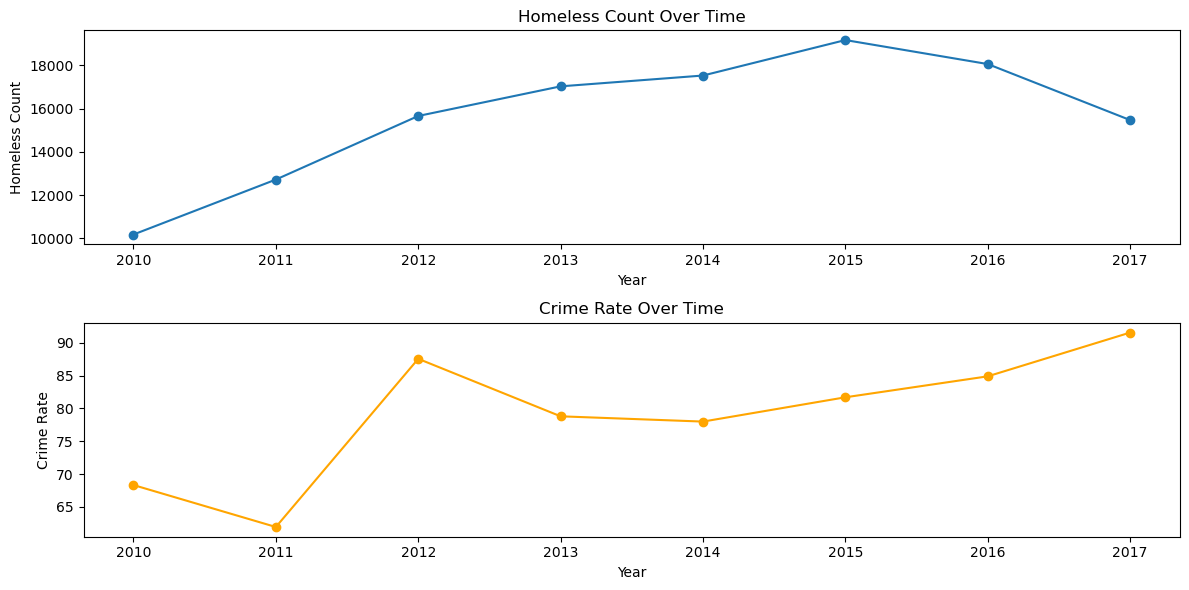

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 10, Jan, 2024
Time:                     18:06:02
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    19.2284
Nobs:                     7.00000    HQIC:                   18.7017
Log likelihood:          -81.3269    FPE:                2.64426e+08
AIC:                      19.2748    Det(Omega_mle):     1.29569e+08
--------------------------------------------------------------------
Results for equation Homeless_Count
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                 11043.760759      5344.987252            2.066           0.039
L1.Homeless_Count         0.659958         0.284364            2.321           0.020
L1.crime_rate           -63.731300 

In [5]:
##时间序列分析
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm



# 加载数据（这里使用之前合并的数据）
# df_analysis: 包含年份、流浪汉数量和平均犯罪率的数据

# 可视化时间序列
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df_analysis_merged['Year'], df_analysis_merged['Homeless_Count'], marker='o')
plt.title('Homeless Count Over Time')
plt.xlabel('Year')
plt.ylabel('Homeless Count')

plt.subplot(2, 1, 2)
plt.plot(df_analysis_merged['Year'], df_analysis_merged['crime_rate'], marker='o', color='orange')
plt.title('Crime Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.tight_layout()
plt.savefig('Homeless Count Over Time.png', dpi=300, bbox_inches='tight')
plt.show()


# 检查平稳性
# 使用ADF测试或其他平稳性测试

# 计算相关性
correlation = df_analysis_merged['Homeless_Count'].corr(df_analysis_merged['crime_rate'])

# 使用VAR模型进行时间序列分析
model = sm.tsa.VAR(df_analysis_merged[['Homeless_Count', 'crime_rate']])
results = model.fit()
# 查看结果摘要
results.summary()


In [6]:
##GWR
import esda  
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
from pylab import figure, scatter, show
%matplotlib inline
from splot.esda import plot_moran
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
from splot.esda import lisa_cluster
from splot.esda import plot_local_autocorrelation
from mgwr.sel_bw import Sel_BW
from mgwr.gwr import GWR, MGWR

In [7]:
map=gpd.read_file('data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')
display(map)

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18..."
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19..."
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19..."
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18..."
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.900 198355.200, 524594.300 19..."


,NAME,geometry
0,Kingston upon Thames,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,"POLYGON ((510253.500 182881.600, 510249.900 18..."
5,Havering,"POLYGON ((549893.900 181459.800, 549894.600 18..."
6,Hillingdon,"POLYGON ((510599.800 191689.500, 510615.200 19..."
7,Harrow,"POLYGON ((510599.800 191689.500, 510660.000 19..."
8,Brent,"POLYGON ((525201.000 182512.600, 525181.500 18..."
9,Barnet,"POLYGON ((524579.900 198355.200, 524594.300 19..."


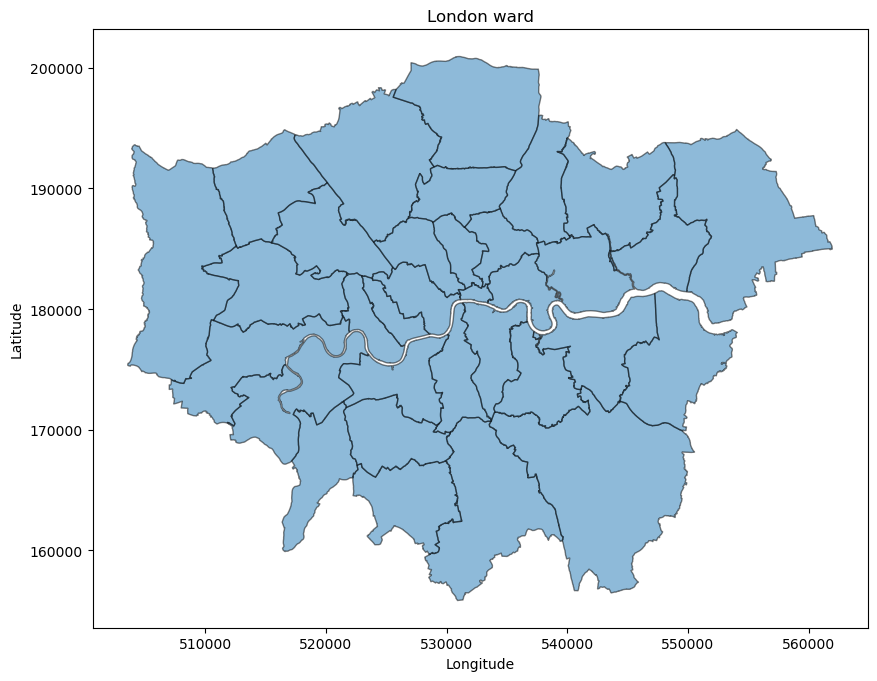

In [8]:
# Load & plot: London ward (city merged)

map=gpd.read_file('data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')[['NAME','geometry']]

display(map)
map.plot(figsize=(10, 8), alpha=0.5, edgecolor='k')
plt.title('London ward')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [11]:
homeless20

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,"Total initial assessments1,2",Unnamed: 5,Total owed a prevention or relief duty\n,Threatened with homelessness within 56 days - \nPrevention duty owed,due to service of valid Section 21 Notice3,Homeless - \nRelief duty owed4,Unnamed: 10,Not homeless nor threatened with homelessness within 56 days - no duty owed,Unnamed: 12,Number of households\n in area4 (000s),Households assessed as threatened with homelessness\nper (000s),Households assessed as homeless\nper (000s),homeless end prevention duty dindt get,homeless with relief duty didn’t get,homeless didn’t get accomadation
0,E92000001,ENGLAND,NaN,NaN,"284,330",NaN,"270,560","119,890","8,960","150,670",NaN,"13,770",NaN,"23,688.89",5.06,6.36,NaN,NaN,NaN
1,E12000007,London,NaN,NaN,"55,350",NaN,"52,210","24,000","1,600","28,200",NaN,"3,140",NaN,"3,563.45",6.74,7.91,9870,7570,17440
2,-,Rest of England,NaN,NaN,"228,980",NaN,"218,350","95,880","7,360","122,470",NaN,"10,630",NaN,"20,125.44",4.76,6.09,37390,37070,74460
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,E12000001,North East,NaN,NaN,"15,370",NaN,"14,790","7,180",350,"7,600",NaN,590,NaN,"1,182.19",6.07,6.43,2560,2970,5530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,Source,DLUHC H-CLIC Homelessness returns (quarterly),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,NaN,email: homelessnessstats@levellingup.gov.uk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,NaN,Latest update: September 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
homeless20.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Total initial assessments1,2', 'Unnamed: 5',
       'Total owed a prevention or relief duty\n',
       'Threatened with homelessness within 56 days - \nPrevention duty owed',
       'due to service of valid Section 21 Notice3',
       'Homeless - \nRelief duty owed4', 'Unnamed: 10',
       'Not homeless nor threatened with homelessness within 56 days - no duty owed',
       'Unnamed: 12', 'Number of households\n in area4 (000s)',
       'Households assessed as threatened with homelessness\nper (000s)',
       'Households assessed as homeless\nper (000s)',
       'homeless end prevention duty dindt get',
       'homeless with relief duty didn’t get',
       'homeless didn’t get accomadation'],
      dtype='object')

In [9]:
homeless2020=homeless20[['Unnamed: 1','Total owed a prevention or relief duty\n','Households assessed as homeless\nper (000s)','homeless end prevention duty dindt get',
       'homeless with relief duty didn’t get',
       'homeless didn’t get accomadation']]
homeless2020_copy = homeless2020.copy()
homeless2020_copy.rename(columns={'Unnamed: 1': 'Borough'}, inplace=True)
homeless2020=homeless2020_copy

In [14]:
homeless2020.head()

,Borough,Total owed a prevention or relief duty\n,Households assessed as homeless\nper (000s),homeless end prevention duty dindt get,homeless with relief duty didn’t get,homeless didn’t get accomadation
0,ENGLAND,"270,560",6.36,NaN,NaN,NaN
1,London,"52,210",7.91,9870,7570,17440
2,Rest of England,"218,350",6.09,37390,37070,74460
3,NaN,NaN,NaN,0,0,0
4,North East,"14,790",6.43,2560,2970,5530


In [10]:
# 从犯罪数据中筛选出2020年的数据
df_crime_2020 = df_crime_population_merged[df_crime_population_merged['Year'] == 2020].dropna()


# 显示2020年各borough的犯罪率
df_crime_2020

# 创建新行的数据
new_row = {'Borough':'City of London', 'Year': '2020','Crime_Count': '908','Population': '9000','Crime_Rate': '100.9'}

# 使用append方法添加新行
df_crime_2020 = pd.concat([df_crime_2020, pd.DataFrame([new_row])], ignore_index=True)



In [11]:
# Merge & View: data & map
Data=pd.merge(df_crime_2020, homeless2020, on='Borough', how='inner')
map.rename(columns={'NAME': 'Borough'}, inplace=True)

columnsto=[ 'Year', 'Crime_Count', 'Population', 'Crime_Rate',
       'Households assessed as homeless\nper (000s)',
       'homeless end prevention duty dindt get',
       'homeless with relief duty didn’t get',
       'homeless didn’t get accomadation']
Data['Total owed a prevention or relief duty\n'] = Data['Total owed a prevention or relief duty\n'].str.replace(',', '').astype(float)
Data[columnsto] = Data[columnsto].apply(pd.to_numeric, errors='coerce')


Data


,Borough,Year,Crime_Count,Population,Crime_Rate,Total owed a prevention or relief duty\n,Households assessed as homeless\nper (000s),homeless end prevention duty dindt get,homeless with relief duty didn’t get,homeless didn’t get accomadation
0,Barking and Dagenham,2020,19187.0,219000,87.611872,1434.0,7.07,500.0,320.0,820
1,Barnet,2020,27388.0,396000,69.161616,2035.0,5.98,429.0,513.0,942
2,Bexley,2020,15601.0,251000,62.155378,794.0,5.20,NaN,NaN,550
3,Brent,2020,28799.0,330000,87.269697,2934.0,14.11,426.0,481.0,907
4,Bromley,2020,22013.0,335000,65.710448,1170.0,4.67,NaN,NaN,260
5,Camden,2020,29574.0,260000,113.746154,1104.0,6.63,166.0,120.0,286
6,Croydon,2020,33313.0,390000,85.417949,2424.0,11.40,266.0,137.0,403
7,Ealing,2020,29361.0,344000,85.351744,2442.0,9.81,405.0,444.0,849
8,Enfield,2020,28862.0,340000,84.888235,1930.0,7.35,443.0,430.0,873
9,Greenwich,2020,25752.0,289000,89.107266,1556.0,8.50,252.0,164.0,416


In [12]:
myData=pd.merge(Data, map, on='Borough', how='inner')
myData=gpd.GeoDataFrame(myData)
display(myData.describe())
myData.head()
# myData.to_csv('data.csv',index=False)

,Year,Crime_Count,Population,Crime_Rate,Total owed a prevention or relief duty\n,Households assessed as homeless\nper (000s),homeless end prevention duty dindt get,homeless with relief duty didn’t get,homeless didn’t get accomadation
count,33.0,33.000000,33.000000,33.000000,33.000000,33.000000,31.000000,31.000000,33.000000
mean,2020.0,23964.484848,272484.848485,88.637510,1704.212121,7.813939,307.709677,248.290323,546.848485
std,0.0,8826.486897,76806.624556,24.706462,890.975054,3.574613,216.088283,171.502419,346.442557
min,2020.0,908.000000,9000.000000,61.994949,12.000000,1.960000,1.000000,1.000000,2.000000
25%,2020.0,17935.000000,240000.000000,69.161616,1065.000000,5.200000,105.000000,114.000000,259.000000
50%,2020.0,24954.000000,280000.000000,87.269697,1731.000000,8.120000,266.000000,177.000000,496.000000
75%,2020.0,29361.000000,325000.000000,100.454829,2166.000000,9.810000,436.000000,404.000000,820.000000
max,2020.0,48558.000000,396000.000000,191.928854,3413.000000,17.870000,868.000000,664.000000,1311.000000


,Borough,Year,Crime_Count,Population,Crime_Rate,Total owed a prevention or relief duty\n,Households assessed as homeless\nper (000s),homeless end prevention duty dindt get,homeless with relief duty didn’t get,homeless didn’t get accomadation,geometry
0,Barking and Dagenham,2020,19187.0,219000,87.611872,1434.0,7.07,500.0,320.0,820,"MULTIPOLYGON (((543905.400 183199.100, 543905...."
1,Barnet,2020,27388.0,396000,69.161616,2035.0,5.98,429.0,513.0,942,"POLYGON ((524579.900 198355.200, 524594.300 19..."
2,Bexley,2020,15601.0,251000,62.155378,794.0,5.20,NaN,NaN,550,"POLYGON ((547226.200 181299.300, 547320.900 18..."
3,Brent,2020,28799.0,330000,87.269697,2934.0,14.11,426.0,481.0,907,"POLYGON ((525201.000 182512.600, 525181.500 18..."
4,Bromley,2020,22013.0,335000,65.710448,1170.0,4.67,NaN,NaN,260,"POLYGON ((540373.600 157530.400, 540361.200 15..."


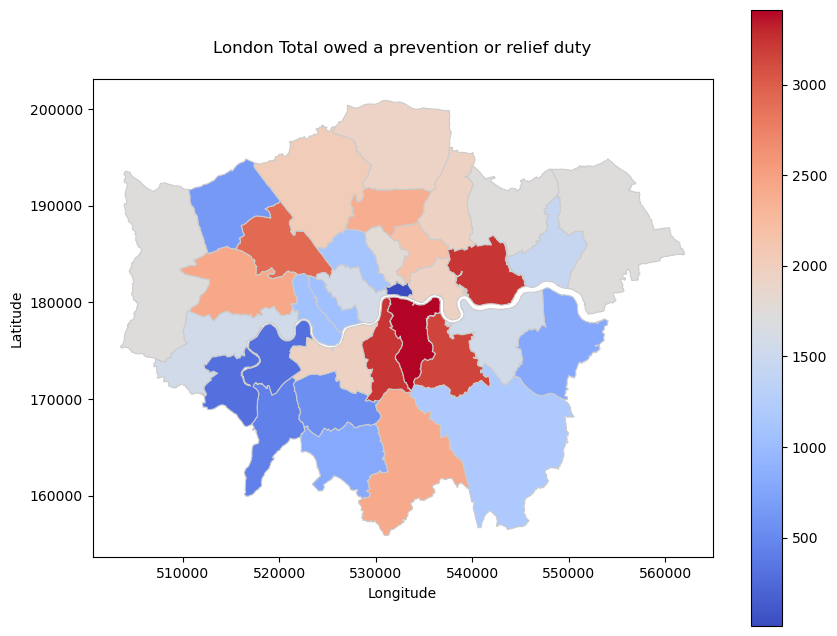

In [25]:
# 绘制地图，根据属性值设置颜色渐变
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
myData.plot(column='Total owed a prevention or relief duty\n', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('London Total owed a prevention or relief duty\n')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# 储存地图为 PNG 图像文件
plt.savefig('London Total owed a prevention or relief duty\n', dpi=300, bbox_inches='tight')
plt.show()


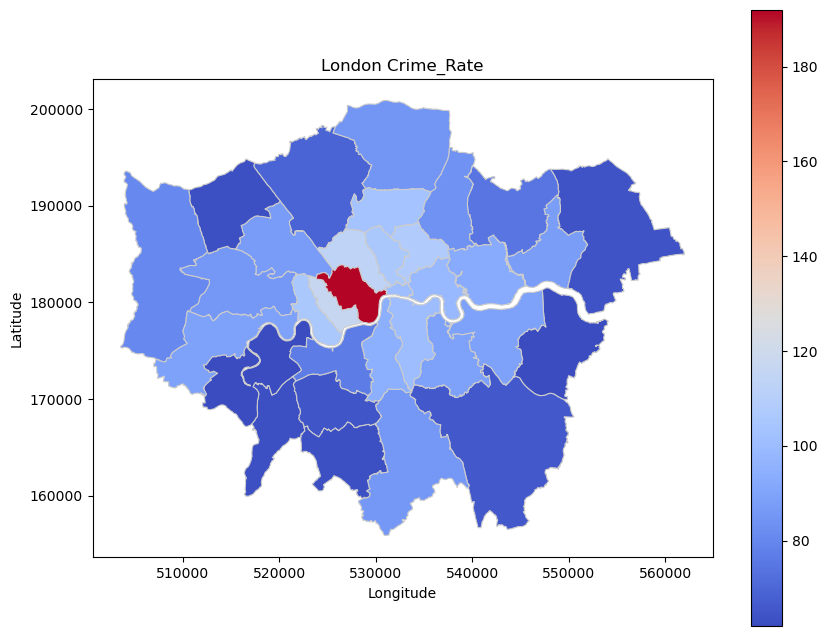

In [24]:
# 绘制地图，根据属性值设置颜色渐变
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
myData.plot(column='Crime_Rate', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('London Crime_Rate')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# 储存地图为 PNG 图像文件
plt.savefig('London Crime_Rate', dpi=300, bbox_inches='tight')
plt.show()


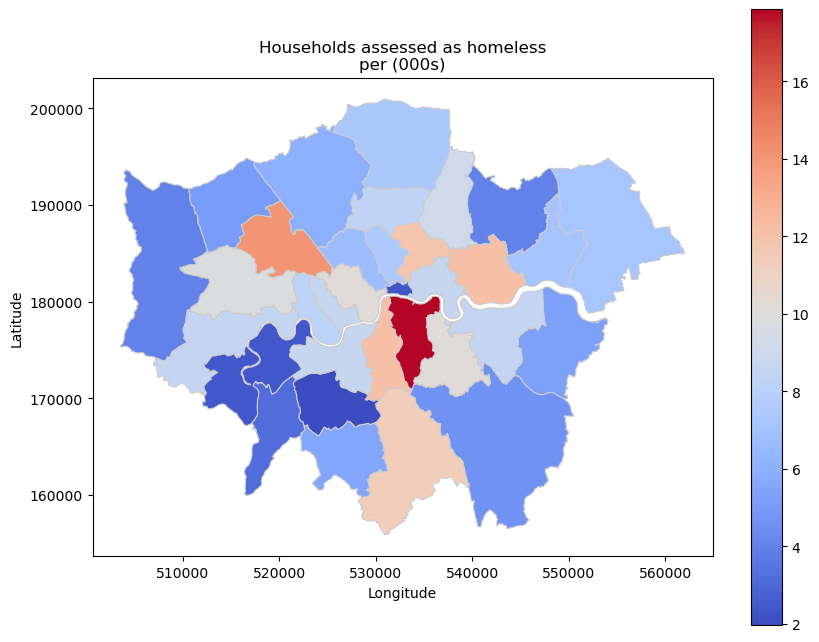

In [23]:
# 绘制地图，根据属性值设置颜色渐变
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
myData.plot(column='Households assessed as homeless\nper (000s)', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Households assessed as homeless\nper (000s)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# 储存地图为 PNG 图像文件
plt.savefig('Households assessed as homeless\nper (000s)', dpi=300, bbox_inches='tight')
plt.show()


/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Model type                                                         Gaussian
Number of observations:                                                  33
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             27.077
Log-likelihood:                                                     -43.561
AIC:                                                                 91.122
AICc:                                                                93.950
BIC:                                                                -81.314
R2:                                                                   0.179
Adj. R2:                                                              0.153

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

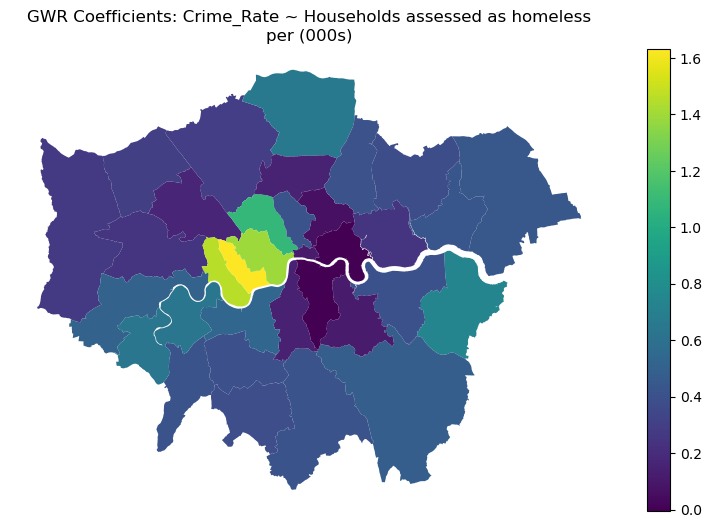

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Model type                                                         Gaussian
Number of observations:                                                  33
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             32.782
Log-likelihood:                                                     -46.716
AIC:                                                                 97.432
AICc:                                                               100.259
BIC:                                                                -75.609
R2:                                                                   0.007
Adj. R2:                                                             -0.025

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

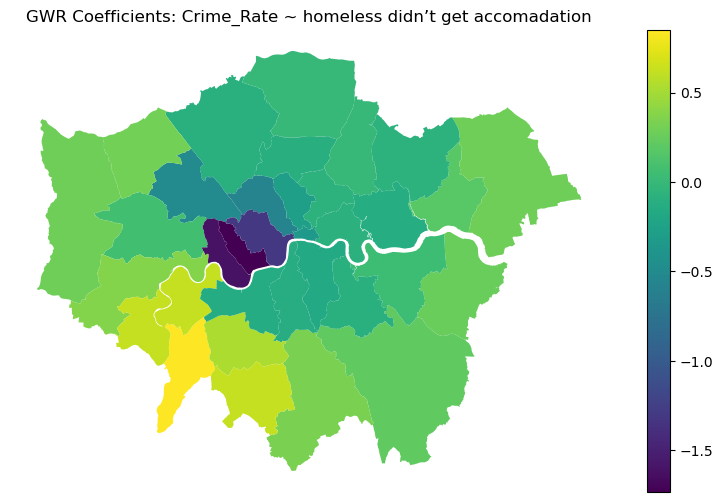

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Model type                                                         Gaussian
Number of observations:                                                  33
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             31.546
Log-likelihood:                                                     -46.081
AIC:                                                                 96.163
AICc:                                                                98.990
BIC:                                                                -76.846
R2:                                                                   0.044
Adj. R2:                                                              0.013

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

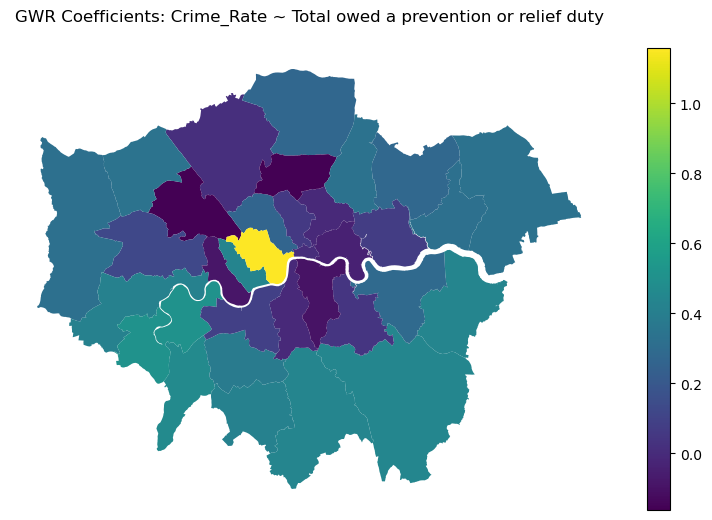

In [22]:
import geopandas as gpd
import pandas as pd
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

def run_gwr(myData, y_column, x_column, bandwidth):
    # 准备数据
    gdf = myData[[y_column, x_column, 'geometry']]
    gdf['coords'] = gdf['geometry'].apply(lambda geom: geom.centroid.coords[0])
    gdf[['X', 'Y']] = pd.DataFrame(gdf['coords'].tolist(), index=gdf.index)

    # 标准化数据
    y = gdf[y_column].values.reshape((-1, 1))
    y = (y - y.mean(axis=0)) / y.std(axis=0)
    X = gdf[[x_column]].values
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    coords = list(zip(gdf['X'], gdf['Y']))

    # 使用固定带宽进行GWR分析
    gwr_model = GWR(coords, y, X, bandwidth)
    gwr_results = gwr_model.fit()
    print(gwr_results.summary())

    # 可视化结果
    gdf['GWR_Coefficient'] = gwr_results.params[:, 1]
    fig, ax = plt.subplots(figsize=(10, 6))
    gdf.plot(column='GWR_Coefficient', legend=True, ax=ax)
    ax.set_title('GWR Coefficients: ' + y_column + ' ~ ' + x_column)
    ax.axis('off')
    

        # 保存图形为图像文件
    plt.savefig(y_column + '_' + x_column + '_GWR.png', dpi=300, bbox_inches='tight')
    # 显示图形
    plt.show()

# 调用函数
run_gwr(myData, "Crime_Rate", "Households assessed as homeless\nper (000s)", 10)
run_gwr(myData, "Crime_Rate", "homeless didn’t get accomadation", 10)
run_gwr(myData, "Crime_Rate", "Total owed a prevention or relief duty\n", 10)


In [19]:
df_crime_2020

,Borough,Year,Crime_Count,Population,Crime_Rate
0,Barking and Dagenham,2020,19187.0,219000,87.611872
1,Barnet,2020,27388.0,396000,69.161616
2,Bexley,2020,15601.0,251000,62.155378
3,Brent,2020,28799.0,330000,87.269697
4,Bromley,2020,22013.0,335000,65.710448
5,Camden,2020,29574.0,260000,113.746154
6,Croydon,2020,33313.0,390000,85.417949
7,Ealing,2020,29361.0,344000,85.351744
8,Enfield,2020,28862.0,340000,84.888235
9,Greenwich,2020,25752.0,289000,89.107266


In [20]:
crime1.columns

Index(['MajorText', 'MinorText', 'BoroughName', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [14]:
# 筛选2020年的数据
col=['MajorText', 'MinorText', 'BoroughName', '2020']
crime2 = crime1[col]
crime2.head()

,MajorText,MinorText,BoroughName,2020
0,Arson and Criminal Damage,Arson,Barking and Dagenham,48
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,1276
2,Burglary,Burglary Business and Community,Barking and Dagenham,282
3,Burglary,Domestic Burglary,Barking and Dagenham,935
4,Drug Offences,Drug Trafficking,Barking and Dagenham,163


In [15]:
crime20=crime2.groupby(['BoroughName','MajorText']).sum().reset_index()
crime20.columns

Index(['BoroughName', 'MajorText', 'MinorText', '2020'], dtype='object')

In [16]:
# 使用pivot函数将'MajorText'变成列标题，'2020'的值作为新列的值
crime2020 = crime20.pivot(index='BoroughName', columns='MajorText', values='2020').reset_index()

# 填充NaN值为0，因为NaN代表没有犯罪记录
crime2020 = crime2020.fillna(0)
# 使用 drop() 方法删除列
crime2020 = crime2020.drop(columns=['Historical Fraud and Forgery'])
crime2020.rename(columns={'BoroughName': 'Borough'}, inplace=True)
crime2020

MajorText,Borough,Arson and Criminal Damage,Burglary,Drug Offences,Miscellaneous Crimes Against Society,Possession of Weapons,Public Order Offences,Robbery,Sexual Offences,Theft,Vehicle Offences,Violence Against the Person
0,Barking and Dagenham,1324,1217,1682,367,202,1179,738,593,3148,2343,6394
1,Barnet,1918,2816,1214,360,173,1757,919,547,5080,5155,7449
2,Bexley,1430,1028,864,248,124,1269,309,372,2253,2393,5311
3,Brent,2060,2127,2291,421,262,2068,984,599,4708,4371,8908
4,Bromley,1728,1746,1290,365,186,1612,496,497,3994,3679,6420
5,Camden,1483,2281,2044,277,172,1886,1204,568,10239,3033,6387
6,Croydon,2440,2343,2831,529,381,2272,963,1007,4661,5050,10836
7,Ealing,2054,2199,2320,516,236,2161,875,712,4842,4611,8835
8,Enfield,1834,2455,1567,451,239,1819,1106,686,4290,5854,8561
9,Greenwich,1986,1674,2025,459,263,1991,757,685,4312,3232,8368


In [17]:

# 数据合并：按照borough合并流浪汉数据和犯罪数据
merge = pd.merge(Data, crime2020, on=['Borough'],how='inner')


merge.head()

,Borough,Year,Crime_Count,Population,Crime_Rate,Total owed a prevention or relief duty\n,Households assessed as homeless\nper (000s),homeless end prevention duty dindt get,homeless with relief duty didn’t get,homeless didn’t get accomadation,...,Burglary,Drug Offences,Miscellaneous Crimes Against Society,Possession of Weapons,Public Order Offences,Robbery,Sexual Offences,Theft,Vehicle Offences,Violence Against the Person
0,Barking and Dagenham,2020,19187.0,219000,87.611872,1434.0,7.07,500.0,320.0,820,...,1217,1682,367,202,1179,738,593,3148,2343,6394
1,Barnet,2020,27388.0,396000,69.161616,2035.0,5.98,429.0,513.0,942,...,2816,1214,360,173,1757,919,547,5080,5155,7449
2,Bexley,2020,15601.0,251000,62.155378,794.0,5.20,NaN,NaN,550,...,1028,864,248,124,1269,309,372,2253,2393,5311
3,Brent,2020,28799.0,330000,87.269697,2934.0,14.11,426.0,481.0,907,...,2127,2291,421,262,2068,984,599,4708,4371,8908
4,Bromley,2020,22013.0,335000,65.710448,1170.0,4.67,NaN,NaN,260,...,1746,1290,365,186,1612,496,497,3994,3679,6420


In [25]:
merge.columns

Index(['Borough', 'Year', 'Crime_Count', 'Population', 'Crime_Rate',
       'Total owed a prevention or relief duty\n',
       'Households assessed as homeless\nper (000s)',
       'homeless end prevention duty dindt get',
       'homeless with relief duty didn’t get',
       'homeless didn’t get accomadation', 'Arson and Criminal Damage',
       'Burglary', 'Drug Offences', 'Miscellaneous Crimes Against Society',
       'Possession of Weapons', 'Public Order Offences', 'Robbery',
       'Sexual Offences', 'Theft', 'Vehicle Offences',
       'Violence Against the Person'],
      dtype='object')

犯罪类型与流浪汉数量的相关性： {'Arson and Criminal Damage': 0.4790147793225451, 'Burglary': 0.2875324510151715, 'Drug Offences': 0.21711377432304768, 'Miscellaneous Crimes Against Society': 0.4671568104660664, 'Possession of Weapons': 0.4143161686250144, 'Public Order Offences': 0.2724544067850863, 'Robbery': 0.27477608099119566, 'Sexual Offences': 0.3655813704617722, 'Theft': -0.0982104331425581, 'Vehicle Offences': 0.5424730534597486}
与流浪汉数量相关性最高的犯罪类型： Vehicle Offences


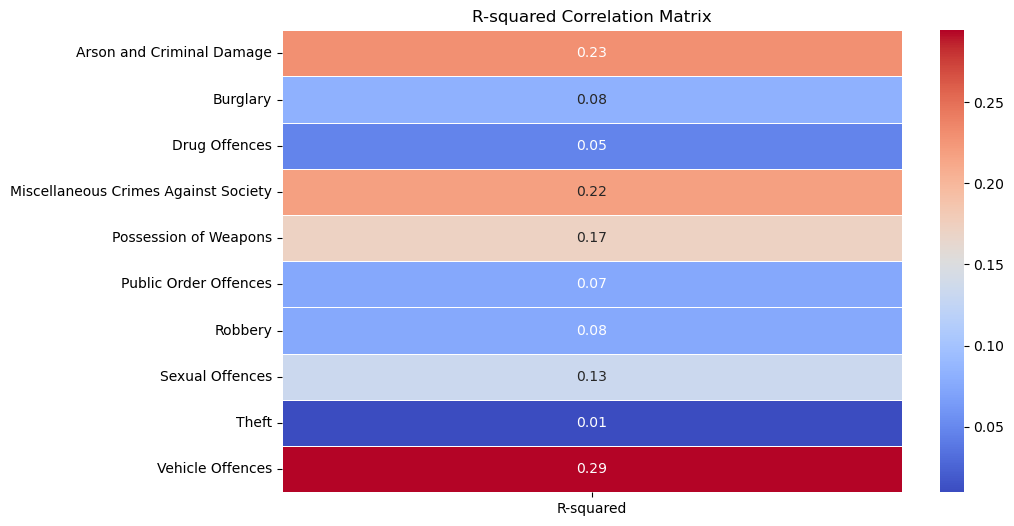

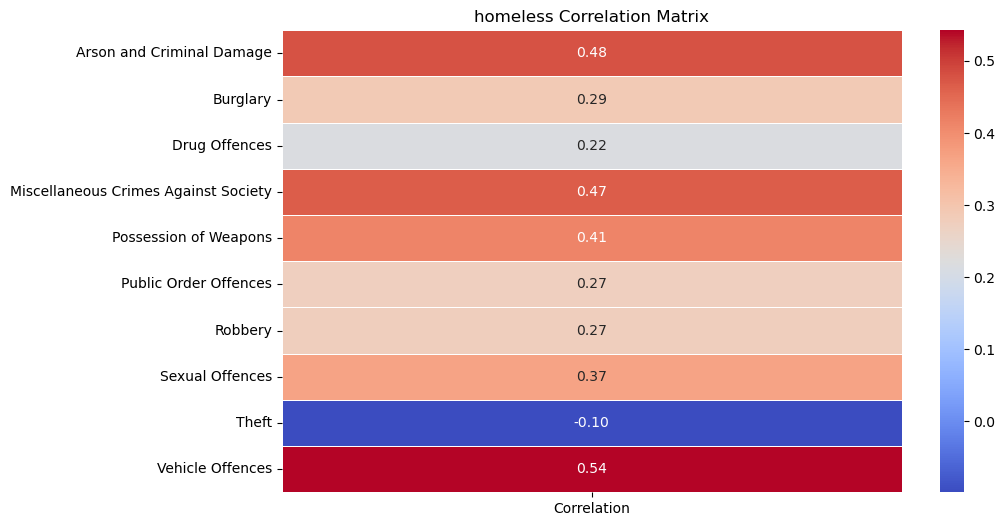

In [18]:

import seaborn as sns

# 初始化一个字典来存储每种犯罪类型与流浪汉数量的相关性
homeless_crime_r_squared = {} 
homeless_crime_correlations = {}
# 对每种犯罪类型计算与流浪汉数量的相关性
# 假设流浪汉数量列名为 'Homeless_Count'
# 犯罪类型数据假设从第三列开始
for crime_type in merge.columns[10:20]:
    correlation, _ = stats.pearsonr(merge['homeless didn’t get accomadation'], merge[crime_type])
    homeless_crime_correlations[crime_type] = correlation
    homeless_crime_r_squared[crime_type] = correlation**2  # 平方相关系数得到R-squared

# 找出相关性最高的犯罪类型
max_correlation_crime1 = max(homeless_crime_correlations, key=homeless_crime_correlations.get)

# 输出结果
print("犯罪类型与流浪汉数量的相关性：", homeless_crime_correlations)
print("与流浪汉数量相关性最高的犯罪类型：", max_correlation_crime1)

# 创建相关性矩阵
correlation_matrix = pd.DataFrame.from_dict(homeless_crime_correlations, orient='index', columns=['Correlation'])
# 创建R-squared矩阵
r_squared_matrix = pd.DataFrame.from_dict(homeless_crime_r_squared, orient='index', columns=['R-squared'])

# 绘制R-squared矩阵图
plt.figure(figsize=(10, 6))
sns.heatmap(r_squared_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('R-squared Correlation Matrix')
plt.savefig('homeless_crime R-squared Correlation Matrix.png', dpi=300, bbox_inches='tight')
plt.show()
# 保存图形为图像文件


# 绘制相关性矩阵图
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('homeless Correlation Matrix')
plt.savefig('homeless_crime Correlation Matrix.png', dpi=300, bbox_inches='tight')
plt.show()



犯罪类型与流浪汉数量的相关性： {'Arson and Criminal Damage': 0.6389059868389364, 'Burglary': 0.6095431127761631, 'Drug Offences': 0.6623713828380153, 'Miscellaneous Crimes Against Society': 0.5414508411908654, 'Possession of Weapons': 0.8119059407551821, 'Public Order Offences': 0.6812083525865842, 'Robbery': 0.6760498659123422, 'Sexual Offences': 0.7061701504069515, 'Theft': 0.4509598399119232, 'Vehicle Offences': 0.3459660315872681}
与流浪汉数量相关性最高的犯罪类型： Possession of Weapons


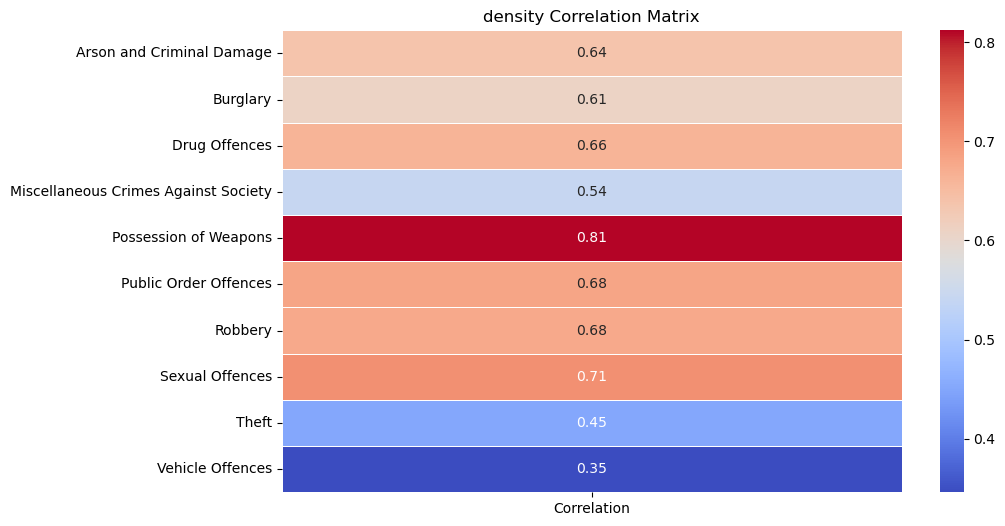

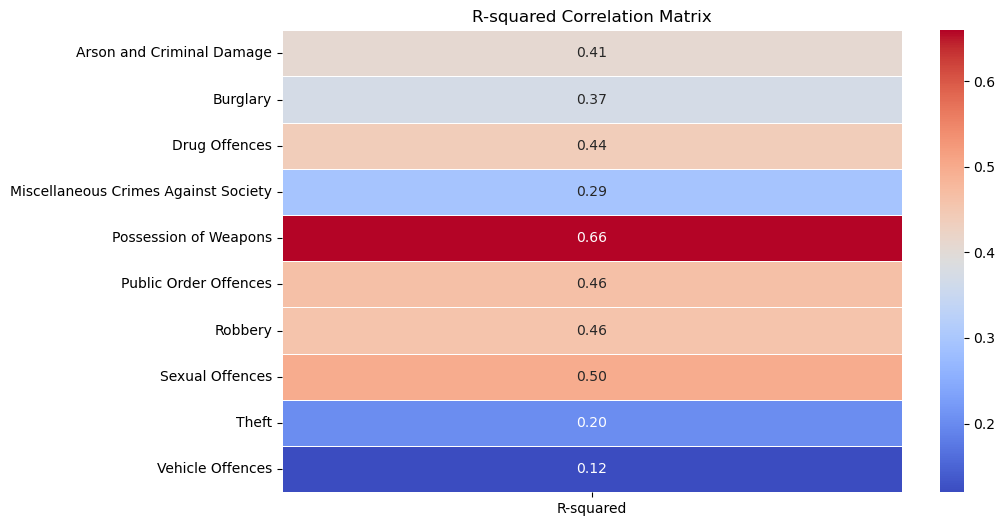

In [20]:
density_crime_correlations = {}
density_crime_r_squared = {}  # 用于存储R-squared值的字典
# 对每种犯罪类型计算与流浪汉数量的相关性
# 假设流浪汉数量列名为 'Homeless_Count'
# 犯罪类型数据假设从第三列开始
for crime_type in merge.columns[10:20]:
    correlation, _ = stats.pearsonr(merge['Households assessed as homeless\nper (000s)'], merge[crime_type])
    density_crime_correlations[crime_type] = correlation
    density_crime_r_squared[crime_type] = correlation**2  # 平方相关系数得到R-squared

# 找出相关性最高的犯罪类型
max_correlation_crime2 = max(density_crime_correlations, key=density_crime_correlations.get)

# 输出结果
print("犯罪类型与流浪汉数量的相关性：", density_crime_correlations)
print("与流浪汉数量相关性最高的犯罪类型：", max_correlation_crime2)

# 创建相关性矩阵
correlation_matrix = pd.DataFrame.from_dict(density_crime_correlations, orient='index', columns=['Correlation'])

# 绘制相关性矩阵图
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('density Correlation Matrix')
plt.savefig('density_crime Correlation Matrix.png', dpi=300, bbox_inches='tight')
plt.show()


# 创建R-squared矩阵
r_squared_matrix = pd.DataFrame.from_dict(density_crime_r_squared, orient='index', columns=['R-squared'])

# 绘制R-squared矩阵图
plt.figure(figsize=(10, 6))
sns.heatmap(r_squared_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('R-squared Correlation Matrix')
plt.savefig('density_crime R-squared Correlation Matrix.png', dpi=300, bbox_inches='tight')
plt.show()



#一般的指导原则：

#R² < 0.3：通常被认为是弱的决定系数。
#0.3 ≤ R² < 0.5：中等程度的解释能力。
#R² ≥ 0.5：较强的解释能力

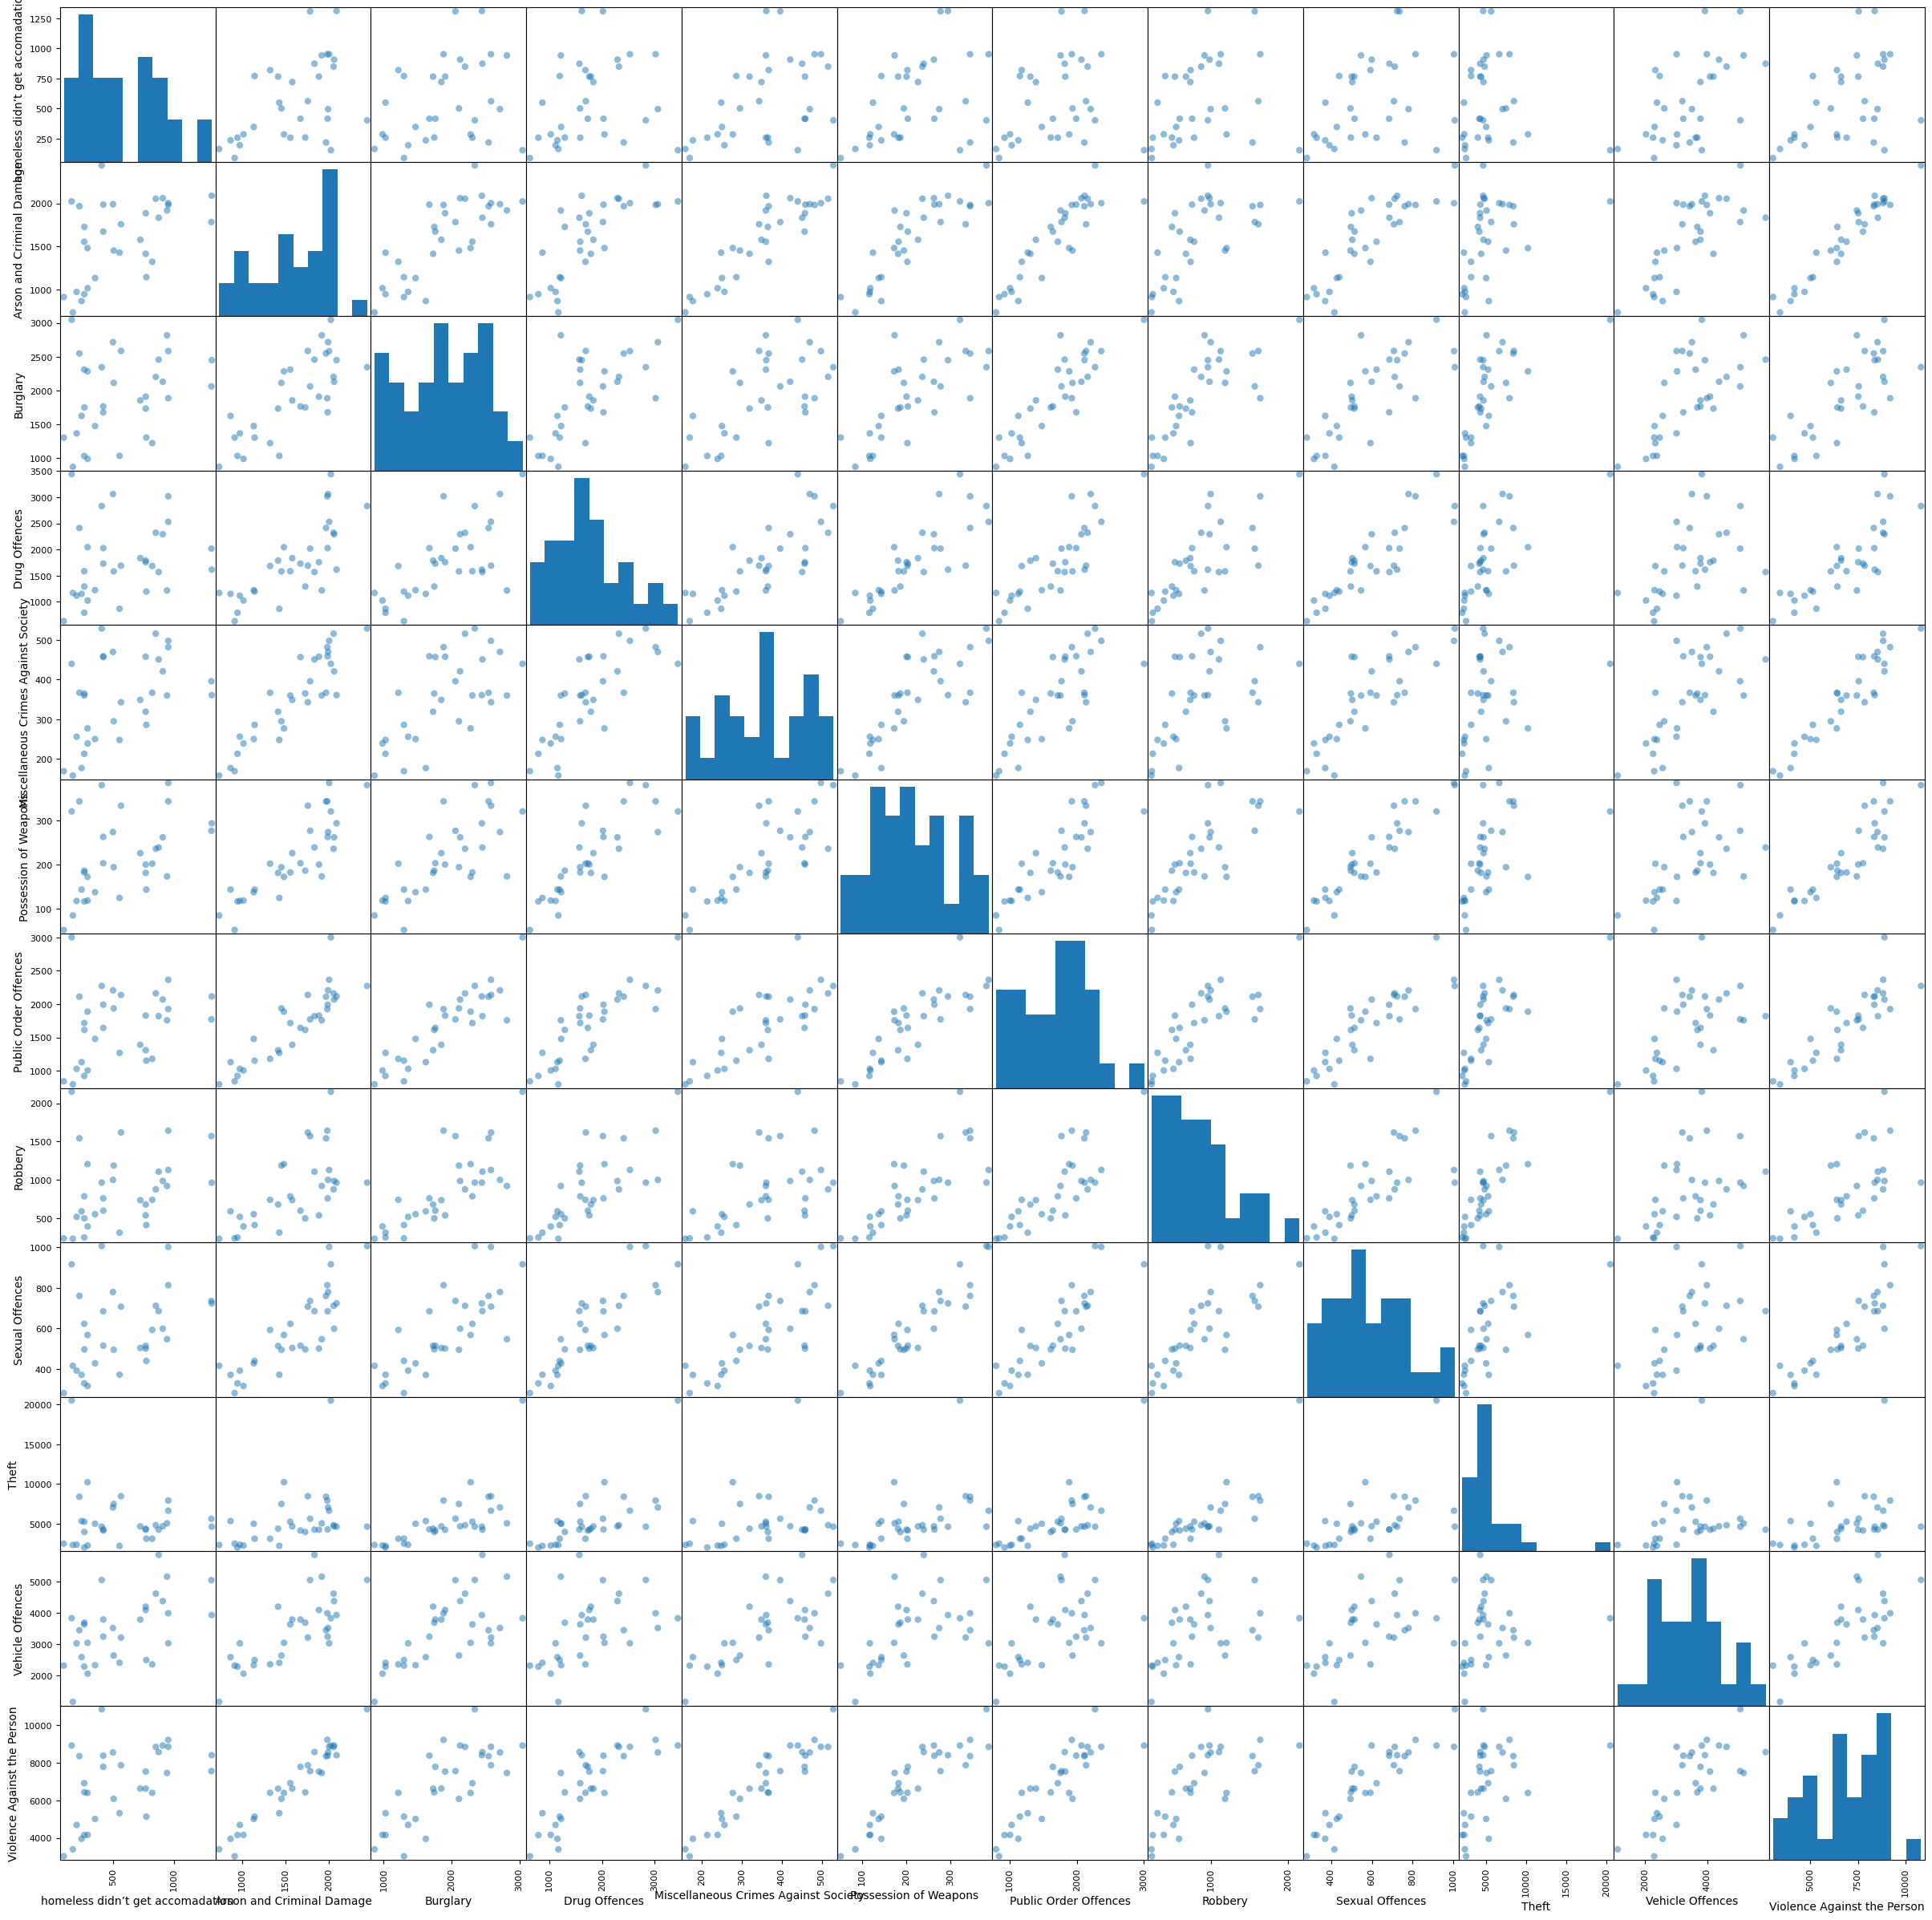

In [21]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
# 创建包含犯罪类型的子数据帧
crime_df = merge[['homeless didn’t get accomadation', 'Arson and Criminal Damage',
       'Burglary', 'Drug Offences', 'Miscellaneous Crimes Against Society',
       'Possession of Weapons', 'Public Order Offences', 'Robbery',
       'Sexual Offences', 'Theft', 'Vehicle Offences',
       'Violence Against the Person']]

# 使用 scatter_matrix 函数创建散点矩阵图
scatter_matrix(crime_df, alpha=0.5, figsize=(30, 30), diagonal='hist', marker='o')
plt.savefig('scatter_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

